# This is a python notebook, it allows us to execute code by entree, to visualize our data in graphs and to markdown commentaries to explain the process

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('OF4.csv',sep=',', encoding = "UTF-8")
df.head()

,LiveGer,KnowOF,UsedOF,OpenOF,Willingness,AppealPC,AppealAC,Pcvalid,FulfillPR,FulfillNews,FulfillDistraction,WillEngifnotEng,Is social status preventing you from using OnlyFans?,What gender do you identify as?,How old are you?,Do you find platforms offering multiple types of content appealing?,Is fear of being judged preventing you from using OnlyFans?,Is not knowing the platform offers multiple types of content preventing you from using OnlyFans?,Are financial reasons preventing you from using OnlyFans?
0,2,1,2,2,2,2,3,1,2,1,2,1,2,1,2,3,2,1,1
1,1,1,2,2,2,6,7,4,2,2,2,1,1,2,2,7,1,2,1
2,1,1,2,2,2,7,7,7,2,2,1,1,2,2,2,7,4,7,2
3,1,1,2,2,2,7,7,6,2,1,1,1,5,1,2,7,6,5,2
4,1,1,2,2,2,5,7,2,2,2,1,1,1,2,2,7,1,1,4


# We begin by reading the excel file, i renamed some of the variables so it's more easy to write and manipulate. I also eliminated some of the other questions which are not useful for the regressions since they do not impact willingness or appeal but rather the different ways of using the platform. I also added a "Willingness" column which sums up the OpenOF and UsedOF columns in one. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 19 columns):
 #   Column                                                                                            Non-Null Count  Dtype
---  ------                                                                                            --------------  -----
 0   LiveGer                                                                                           175 non-null    int64
 1   KnowOF                                                                                            175 non-null    int64
 2   UsedOF                                                                                            175 non-null    int64
 3   OpenOF                                                                                            175 non-null    int64
 4   Willingness                                                                                       175 non-null    int64
 5   AppealPC       

# This command allows us to check for any invalid or missing data. Data is clean 

In [4]:
df['Willingness'].value_counts()

1    111
2     64
Name: Willingness, dtype: int64

In [8]:
df['How old are you?'].value_counts()

2    135
3     35
4      3
5      1
1      1
Name: How old are you?, dtype: int64

# Data is highly imbalanced in group ages since 170 out of 175 persons are aged between 18 and 36.

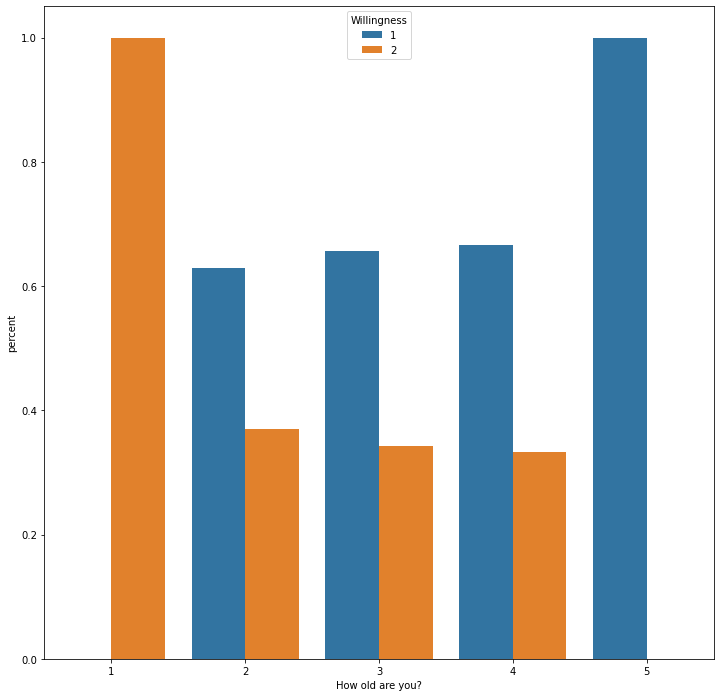

In [7]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['How old are you?','Willingness']).size() / df.groupby(['How old are you?']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='How old are you?', hue='Willingness', y='percent', data=pct2)
plt.show()

  # If we try to visualize the percentage of people willing to use OF by age groups, we can see that higher age means higher willingness but since data is biased ( there are very few people over 36 years old), it is impossible to conclude wether or not age matters in the use of the platform.

In [9]:
df['AppealPC'].value_counts()

6    39
5    39
7    38
4    22
1    15
2    13
3     9
Name: AppealPC, dtype: int64

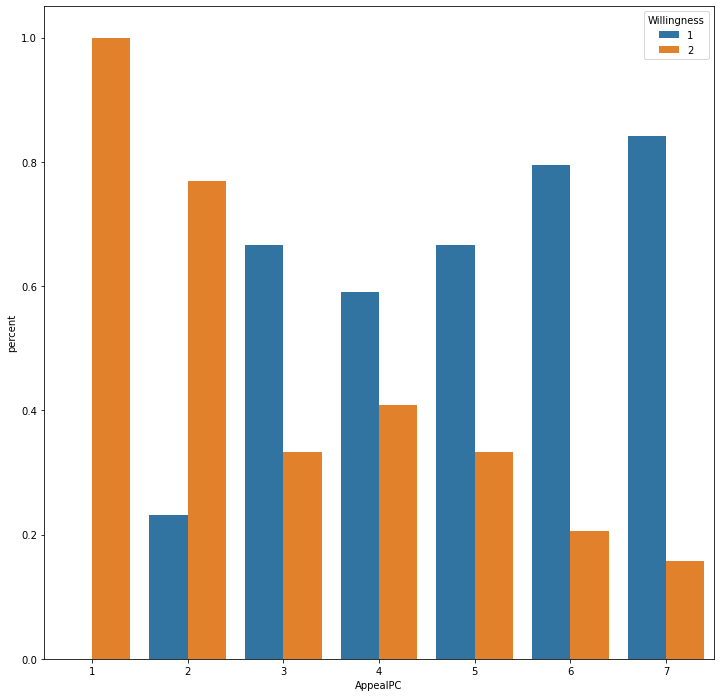

In [10]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['AppealPC','Willingness']).size() / df.groupby(['AppealPC']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='AppealPC', hue='Willingness', y='percent', data=pct2)
plt.show()

# I mesured the impact of Personnalised Content on the willingness of using OF by creating a barplot. As you can see the higher the person thinks that PC is appealing, the higher the chances for her to be willing to use OF. Therefore, it is highly probable that receiving Personnalised Content increases the willingness to use the platform.

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x = df[['AppealPC']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  

logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.76


# Since willingness is a discrete and non continuous target, Linear regressions are irrelevant so we switch over to Logistic Regression which is more suited to categorical data. We first train our model using 60% of the data so it can analyse the patterns. We then test it out on the remaining 40% to see if the variables used are explaining the observed behavior. In this Regression, we only used the Appeal of PC to explain Willingness and we got an accuracy of 75% which is pretty good considering we used only one variable. It means that a person's appeal of PC has a great impact on their willingness to use OF

In [14]:
df['AppealAC'].value_counts()

7    67
6    37
5    30
4    25
1     8
3     5
2     3
Name: AppealAC, dtype: int64

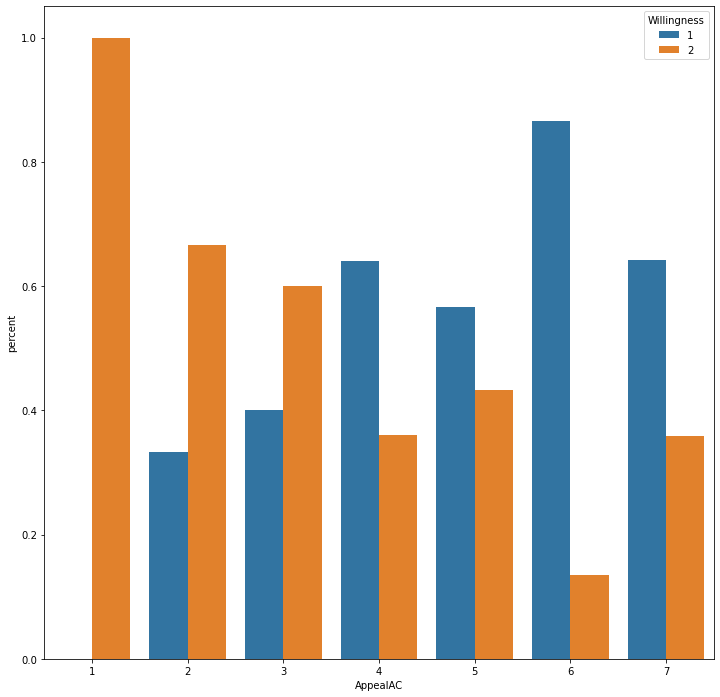

In [15]:
plt.figure(figsize=(12,12))
pct2 = (df.groupby(['AppealAC','Willingness']).size() / df.groupby(['AppealAC']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='AppealAC', hue='Willingness', y='percent', data=pct2)
plt.show()

# The same goes for Authentic Content 

In [20]:
x = df[['AppealAC']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  

logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.73


# For AC, accuracy drops to 73% which means that the appeal of AC has an impact on Willingness but it's less than the appeal of PC.

In [57]:
x = df[['AppealPC', 'AppealAC']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  

logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.76


In [23]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 23 , 23 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

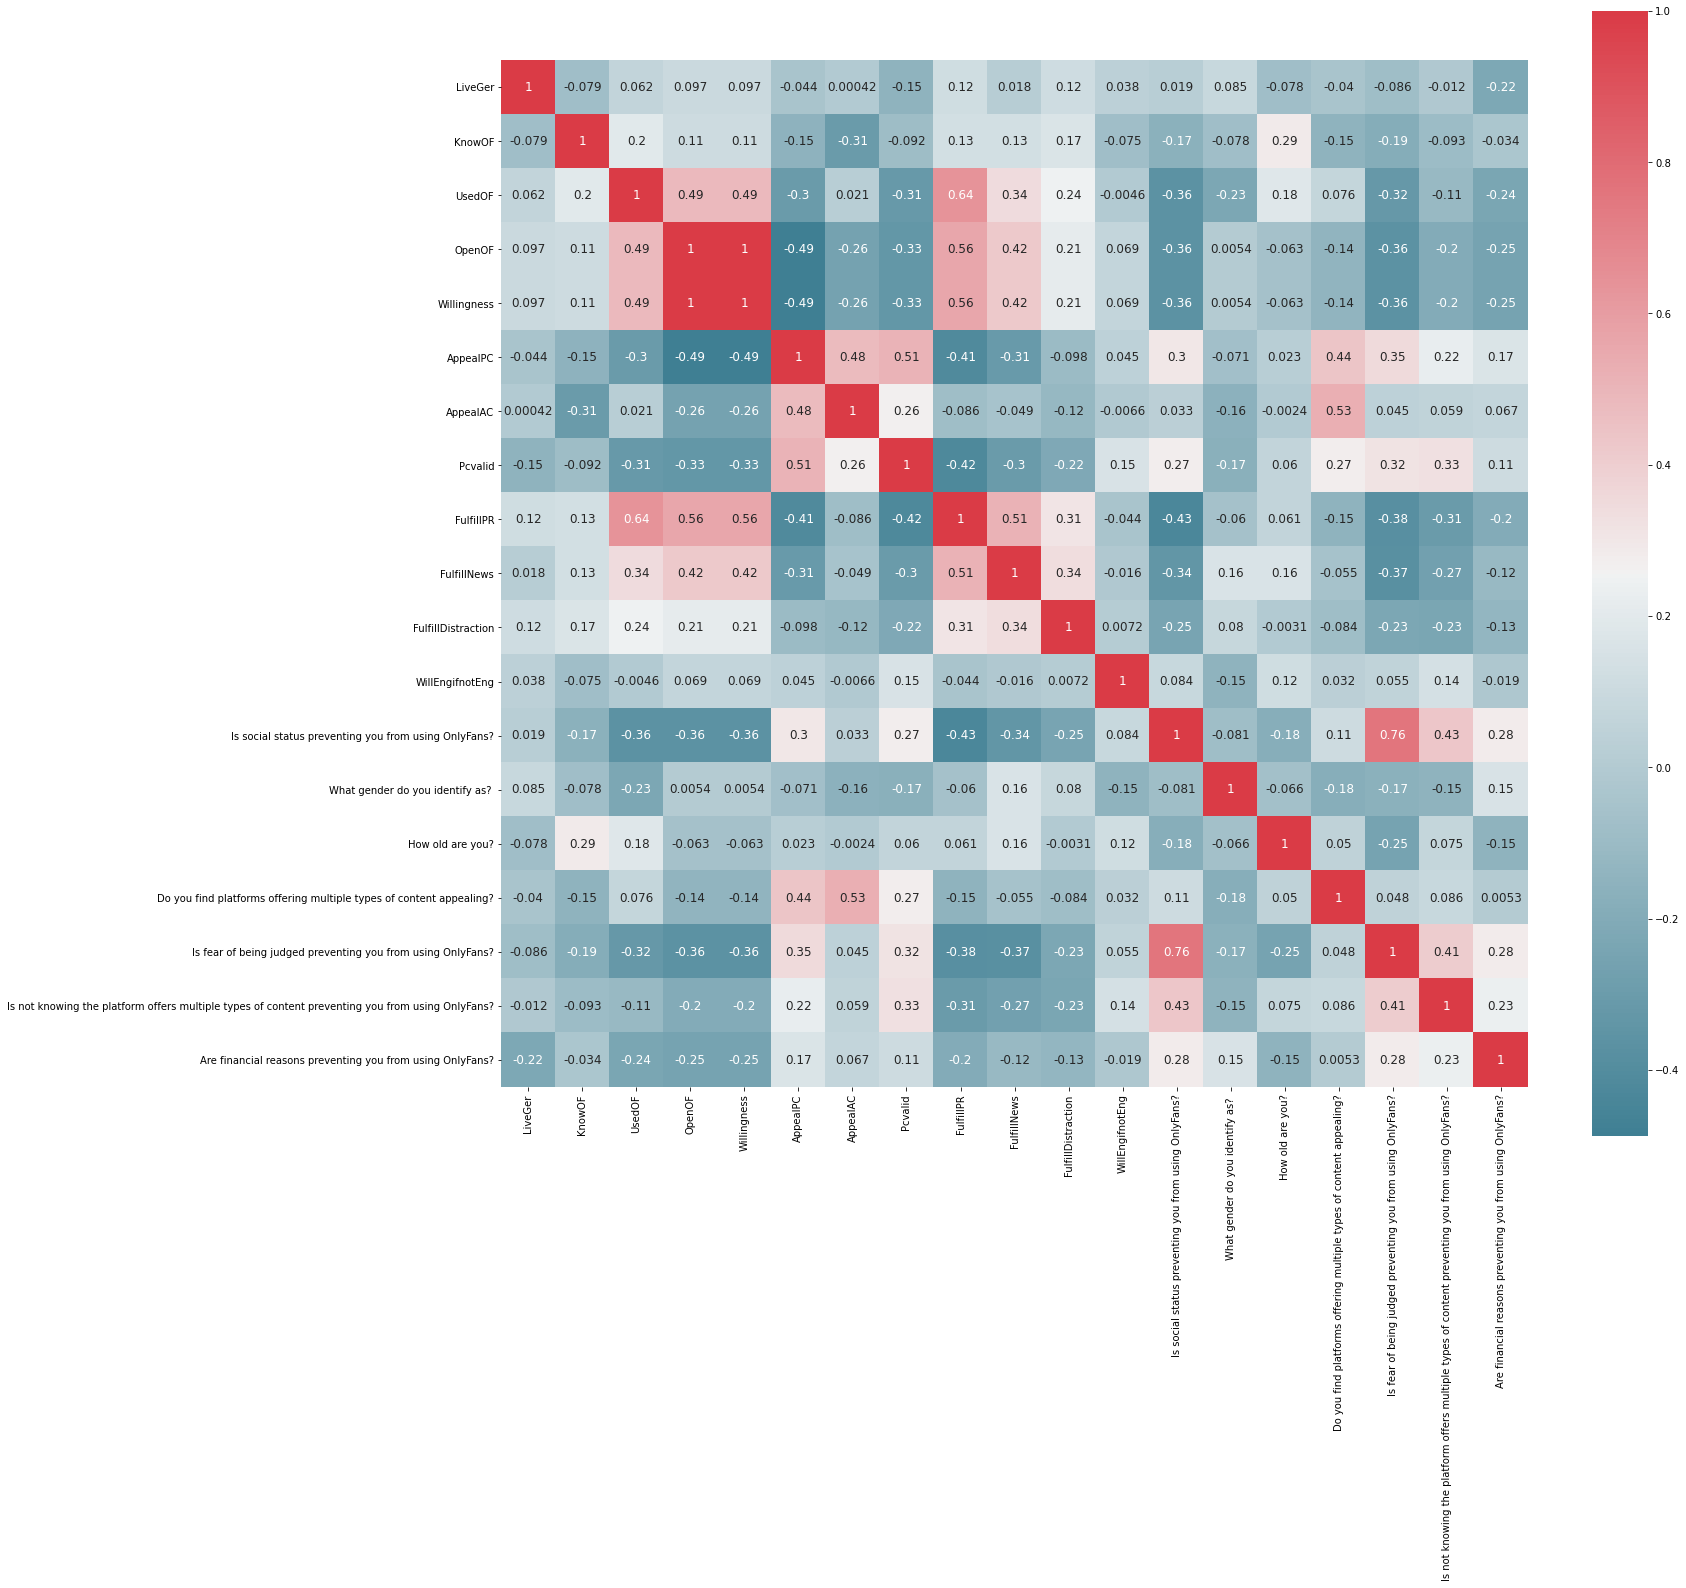

In [24]:
plot_correlation_map(df)

# This is a correlation heatmap of all the variables used. It only mesures linear correlations between variables. The more it is close to 1 , the more the variables are positevely linearly correlated. The more it is close - 1 , the more the variables are negatively linearly correlated. If the score is close to 0 , we can't conclude on correlation. As you can see, the variable that is more positively correlated to Willingness is "FulfillPR", which means that people for whom the use of Content Creation platforms fulfills their need of personal relationships are more willing to use OF.

# In this part, we will test out each variable to see if it increases or maintains the accuracy of our model, if not, we will conclude that the variable doesn't have a great impact on the willingness. "x" refers to the variable used to explain willingness.

In [40]:

x = df[['AppealPC', 'AppealAC', 'FulfillNews']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.76


# Fulfilling news need have little to no impact on willingness

In [43]:

x = df[['AppealPC', 'AppealAC', 'FulfillNews', 'FulfillDistraction']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.76


# Same for Distraction 

In [44]:

x = df[['AppealPC', 'AppealAC', 'FulfillNews', 'FulfillDistraction', 'WillEngifnotEng']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


# People who are willing to use an English platform if their native language is not English are more willing to use OF than others.

In [45]:

x = df[['AppealPC', 'AppealAC', 'FulfillNews', 'FulfillDistraction', 'WillEngifnotEng', 'Is social status preventing you from using OnlyFans?']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


# Social Status has little to no impact 

In [49]:

x = df[['AppealPC', 'AppealAC', 'FulfillNews', 'FulfillDistraction', 'WillEngifnotEng', 'Is social status preventing you from using OnlyFans?','How old are you?']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.74


# Age has a negative impact on accuracy which is normal since it is highly imbalanced. Apart from the 18-36 category, over categories are almost not represented.

In [52]:

x = df[['AppealPC', 'AppealAC', 'FulfillNews', 'FulfillDistraction', 'WillEngifnotEng', 'Is social status preventing you from using OnlyFans?','Do you find platforms offering multiple types of content appealing?']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


# The appeal of platforms offering multiple types of content doesn't has little to no impact.

In [54]:

x = df[['AppealPC', 'AppealAC', 'FulfillNews', 'FulfillDistraction', 'WillEngifnotEng', 'Is social status preventing you from using OnlyFans?','Do you find platforms offering multiple types of content appealing?', 'Is not knowing the platform offers multiple types of content preventing you from using OnlyFans?']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.77


 # Not knowing the platform's offer has little to no impact

In [55]:

x = df[['AppealPC', 'AppealAC', 'FulfillNews', 'FulfillDistraction', 'WillEngifnotEng', 'Is social status preventing you from using OnlyFans?','Do you find platforms offering multiple types of content appealing?', 'Is not knowing the platform offers multiple types of content preventing you from using OnlyFans?', 'Is fear of being judged preventing you from using OnlyFans?']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.79


# Fear of being judged increases accuracy by 2% which means it has a moderate impact on willingness.

In [56]:

x = df[['AppealPC', 'AppealAC', 'FulfillNews', 'FulfillDistraction', 'WillEngifnotEng', 'Is social status preventing you from using OnlyFans?','Do you find platforms offering multiple types of content appealing?', 'Is not knowing the platform offers multiple types of content preventing you from using OnlyFans?', 'Is fear of being judged preventing you from using OnlyFans?', 'Are financial reasons preventing you from using OnlyFans?']]
y = df['Willingness']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.79


# Financial reasons have little to impact